# Onderzoek Data Science: Films
----

Voor de casusopdracht van het vak Data Science moet er een pipeline worden gemaakt, waarbij een toegewezen dataset wordt geanalyseerd. Dit data onderzoek is gebaseerd op de dataset over films en is opgezet door groep 6 van klas V2C. De dataset is toegewezen door de Hogeschool Utrecht en bevat onder andere:
- filmgegevens, waaronder duur, genres, taal, land van herkomst, budget en opbrengst;
- likes op facebook voor regisseur, hoofdrolspelers, totale cast en de film zelf;
- score op IMDB en aantal reviews. 


#### Hoofdvraag
Voor dit onderzoek is er een verplichte onderzoeksvraag, die luidt als volgt: 
- In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?

#### Deelvragen
Het bevat een aantal onderzoeksvragen die wij zullen behandelen:

|Beeordeling                    |Deelvraag                                                                             |
|:------------------------------|:-------------------                                                                  |
|Externe dataset                |Hoeveel effect heeft de lengte van een trailer op de omzet van de film?               |
|Interactieve visualisatie      |Wat is de totale winst van alle films per jaar?                                       |
|Correlatieonderzoek            |Is een film succesvoller op basis van het aantal likes die een acteur (of acteurs) heeft/hebben op facebook?                                                                                              | 
|Supervised Machine Learning    |In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?                                                                                                          |
|Unsupervised Machine Learning  |Is een film succesvoller op basis van het aantal likes die een acteur (of acteurs) heeft/hebben op facebook?                                                                                              |

#### Z-test
Voor de hypothesetoets Z-test moet het volgende gebeuren.	
Een filmcriticus stelt dat de score van Engelstalige films lager is dan gemiddeld.
Wij moeten onderzoeken met de dataset of deze filmcriticus gelijk heeft. We nemen een steekproef (met pandas.DataFrame.sample(n=100,random_state=1)) van 100 Engelstalige films en beschouwen de hele dataset als populatie. Ook nemen we als betrouwbaarheid 90%. We gebruiken van de dataset alleen de filmgegevens waarbij zowel de taal (language) als de score (imdb_score) bekend zijn.

#### Teamleden
Het team bestaat uit de volgende drie personen:
- Sebastiaan Jansen
- Skott de Koster
- Mustafa Toprak

### Inhoudsopgave
---
1. Data Collection
2. Data Processing
3. Data Cleaning
4. Data Exploration & Analysis
5. Model building
6. Visualization
7. Communication

## Stap 1: Data collection
---

De dataset is aan ons gegeven door de Hogeschool Utrecht als onderdeel van de opdracht. Deze dataset houd een groot CSV bestand in met informatie over films. We hebben dus nu de data verzameld en gaan het nu inlezen.
De dataset is opgehaald van de volgende GitHub link: https://github.com/tijmenjoppe/ComputationalModelling-student/tree/master/casus/movie

Ook maken wij gebruik van een externe dataset. Deze externe dataset bevat een link ID naar de trailers van de films die op YouTube te vinden zijn. De externe dataset is opgehaald van de link: https://grouplens.org/datasets/movielens/20m-youtube/

## Stap 2: Data processing
---

We gaan nu de dataset inlezen en verwerken om het beter te kunnen bekijken. Om te beginnen importeren we de benodigde Python libraries:

In [2]:
# Deze libraries zijn voor het verwerken van de data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Deze libraries zijn voor het verkrijgen van YouTube video gegevens. Dit is relevant voor het gebruik van de externe dataset.
import pafy
from youtube_dl import YoutubeDL
import datetime 

Vervolgens lezen we de eerste (toegewezen) dataset in. Hiervoor gebruiken we pandas.read_csv en slaan we dit op in de dataframe "films". 
Aangezien de dataset erg groot is, laten we voor nu alleen de eerste 5 rijen zien. Dit doen we door een variabele films.head() aan te roepen:

In [3]:
films = pd.read_csv('movie.csv', sep=",")
films.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Hetzelfde doen we met de tweede (externe) dataset, deze noemen we "films_extern": 

In [4]:
films_extern = pd.read_csv('ml-youtube.csv', sep=",")
films_extern.head()

,youtubeId,movieId,title
0,K26_sDKnvMU,1,Toy Story (1995)
1,3LPANjHlPxo,2,Jumanji (1995)
2,rEnOoWs3FuA,3,Grumpier Old Men (1995)
3,j9xml1CxgXI,4,Waiting to Exhale (1995)
4,ltwvKLnj1B4,5,Father of the Bride Part II (1995)


We zien dus dat de eerste dataset uit veel films bestaat. De tweede dataset heeft er nog veel meer, maar niet alle data in de sets is bruikbaar, dus dat gaan we nu schoonmaken.

# Stap 3: Data cleaning
---

We gaan nu de data schoon maken. Om te beginnen schonen we beide datasets op door alle data die niet relevant is te verwijderen:

In [5]:
to_drop = ['color','facenumber_in_poster','country','aspect_ratio','content_rating']
films.drop(to_drop, inplace=True, axis=1)

films_extern.drop('movieId', inplace=True, axis=1)

In [6]:
# We verwijderen de rijen met NaN gegevens in beide datasets, aangezien dit data is die we niet kunnen gebruiken.
films = films.dropna()
films_extern = films_extern.dropna()

In [7]:
# We halen alle duplicates eruit.
films = films.drop_duplicates(subset="movie_title")
films_extern = films_extern.drop_duplicates(subset="title")

In [8]:
# We halen een whitespace weg in de eerste dataset die er niet in hoort te zitten.
# We slicen de laatste 7 characters van de title column (het jaar dat de film uitkwam) in de tweede dataset weg,
# zodat de column overeen komt met de column in de eerste dataset.
films.update(films['movie_title'].str[:-1])
films_extern.update(films_extern['title'].str[:-7])

In [9]:
# We setten de indexes van beide datasets naar de titel van de films.
films.set_index('movie_title', inplace=True)
films_extern.set_index('title', inplace=True)

In [10]:
# We sorteren beide datasets zodat de waardes gelijk zullen zijn.
films = films.sort_index()
films_extern = films_extern.sort_index()

Nu ziet de eerste dataset er zo uit:

In [11]:
films.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
10 Cloverfield Lane,Dan Trachtenberg,411.0,104.0,16.0,82.0,John Gallagher Jr.,14000.0,71897215.0,Drama|Horror|Mystery|Sci-Fi|Thriller,Bradley Cooper,...,Sumalee Montano,alien|bunker|car crash|kidnapping|minimal cast,http://www.imdb.com/title/tt1179933/?ref_=fn_t...,440.0,English,15000000.0,2016.0,338.0,7.3,33000
10 Things I Hate About You,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,Comedy|Drama|Romance,Joseph Gordon-Levitt,...,Andrew Keegan,dating|protective father|school|shrew|teen movie,http://www.imdb.com/title/tt0147800/?ref_=fn_t...,549.0,English,16000000.0,1999.0,13000.0,7.2,10000
102 Dalmatians,Kevin Lima,84.0,100.0,36.0,439.0,Eric Idle,2000.0,66941559.0,Adventure|Comedy|Family,Ioan Gruffudd,...,Jim Carter,dog|parole|parole officer|prison|puppy,http://www.imdb.com/title/tt0211181/?ref_=fn_t...,77.0,English,85000000.0,2000.0,795.0,4.8,372
10th & Wolf,Robert Moresco,26.0,107.0,53.0,463.0,Brad Renfro,954.0,53481.0,Crime|Drama|Thriller,Brian Dennehy,...,Dash Mihok,desert storm|fbi|fbi agent|fragmentation grena...,http://www.imdb.com/title/tt0360323/?ref_=fn_t...,34.0,English,8000000.0,2006.0,551.0,6.4,294
12 Rounds,Renny Harlin,113.0,108.0,212.0,347.0,Ashley Scott,969.0,12232937.0,Action|Crime|Thriller,Taylor Cole,...,Nick Gomez,2000s|detective|sadist|terrorism|terrorist,http://www.imdb.com/title/tt1160368/?ref_=fn_t...,113.0,English,22000000.0,2009.0,794.0,5.6,0


En ziet de tweede dataset er zo uit:

In [12]:
films_extern.head()

,youtubeId
title,
"""Great Performances"" Cats",fpIzXaJS18s
#chicagoGirl: The Social Network Takes on a Dictator,Dq31M_MUtU4
$ (Dollars),yDLMPb9rspo
$5 a Day,DsC3fxNTyno
$9.99,Ls4t_y6lTUo


Nu gaan we beide datasets samenvoegen tot 1 dataframe, deze noemen we 'films_extern_merge'. Het idee is om de youtubeId column van de tweede dataset te verwerken in de eerste dataset. Deze gemergde dataset gaan we later gebruiken.

In [13]:
# Omdat de youtubeId column het enige is wat relevant is, is dat ook het enige veld dat we toevoegen. 
# De indexes van de eerste en tweede dataset worden samengevoegd tot 1 index genaamd title.
films_extern_merge = pd.merge(films, films_extern, left_index=True, right_index=True)
films_extern_merge.index.name = 'title'

# Tot slot droppen we de niet-relevante kollomen. Om code te besparen, overschrijven we alleen de dataframe met de relevante kollomen.
films_extern_merge = films_extern_merge[['gross','youtubeId']]
films_extern_merge

,gross,youtubeId
title,,
10 Things I Hate About You,38176108.0,wRo7iUQMcTM
102 Dalmatians,66941559.0,cGHh59Oj8eU
10th & Wolf,53481.0,12wdi73Kbxk
12 Rounds,12232937.0,Mp3Aqe8FrNE
12 Years a Slave,56667870.0,v2fDTOdWuQQ
...,...,...
Zoolander,45162741.0,t1krvnjzV4w
Zoom,11631245.0,5y7q5b3WyEc
eXistenZ,2840417.0,IEuykd38iNE


Je kunt zien dat er 2827 films zijn. Dit is bijna de helft minder dan er in de oorspronkelijke eerste dataset stond, dit is omdat we de onbruikbare data hebben verwijderd en er alleen bruikbare data is overgebleven.
We gaan de gemergede dataset nu verkennen en analyseren.

# Stap 4: Data exploration & analysis
---

Om de data te verkennen en er een betere grip op te krijgen zullen wij een paar commando's loslaten op de verwerkte data. Als eerste zullen wij een .describe gebruiken om een overzicht te krijgen van alle info van de numerieke waardes. Op deze manier kunnen wij bijvoorbeeld de gemiddelde lengte van een film zien. Dit is bij deze dataset dus 105 minuten.

In [14]:
films.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3.746000e+03,3.746000e+03,3746.000000,3746.000000,3.746000e+03,3746.000000,3746.000000,3746.000000,3746.000000
mean,162.129471,109.948745,795.040577,741.778964,7571.493326,5.074255e+07,1.025283e+05,11223.484517,324.590763,4.187352e+07,2002.973839,1950.470101,6.463134,8986.966364
std,122.539805,22.775916,3054.796865,1830.111933,15516.568066,6.892223e+07,1.511889e+05,18991.638978,403.885010,1.080410e+08,9.847237,4471.785744,1.057700,21288.420014
min,1.000000,34.000000,0.000000,0.000000,0.000000,1.620000e+02,4.000000e+01,0.000000,2.000000,2.180000e+02,1927.000000,0.000000,1.600000,0.000000
25%,73.000000,95.000000,10.000000,184.000000,722.000000,6.998743e+06,1.744750e+04,1827.500000,103.000000,1.000000e+07,1999.000000,365.250000,5.900000,0.000000
50%,133.000000,106.000000,58.000000,428.000000,1000.000000,2.784238e+07,5.032400e+04,3890.500000,202.000000,2.400000e+07,2004.000000,664.000000,6.600000,192.000000
75%,219.000000,120.000000,221.000000,685.000000,12000.000000,6.524730e+07,1.229042e+05,15920.500000,388.000000,5.000000e+07,2010.000000,970.000000,7.200000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.300000,349000.000000


Om de data verder te verkennen en een beter gevoel te krijgen kunnen wij gebruik maken van grafieken. Zo staat hieronder bijvoorbeeld een staafdiagram van het aantal films per jaartal. In de x as staat het jaartal, deze zijn gesorteerd bij hoeveel films er in dat jaartal zijn uitgekomen die in deze dataset staan. De meeste films uit deze dataset komen dus uit 2002.

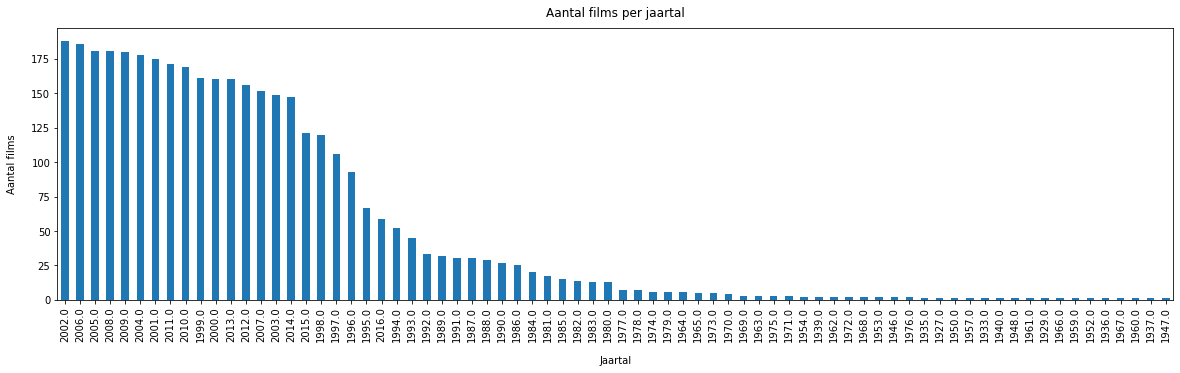

In [15]:
films['title_year'].value_counts().plot(kind='bar', width=0.5,figsize=(20,5));
plt.xlabel("Jaartal", labelpad=14)
plt.ylabel("Aantal films", labelpad=14)
plt.title("Aantal films per jaartal", y=1.02);

## Onderzoeks vragen
---

Voor deze notebook moeten er verschillende onderzoeksvragen worden uitgewerkt, elk met hun eigen antwoord en andere manier van oplossen. Deze zullen nu 1 voor 1 worden uitgewerkt.

### Vraag 1: Hoeveel effect heeft de lengte van een trailer op de omzet van de film?
---

Trailers zijn een belangrijk onderdeel van films. Je wilt immers wel enigzins weten wat je kan verwachten van de film.<br>
Dit kan ook een factor spelen in de omzet van de film. Want als de trailer slecht is zal je waarschijnlijk ook niet snel naar de film gaan, en dan zal de film dus ook minder omzet hebben.<br>
We gebruiken hier alleen de lengte van de trailer, om het simpel te houden.

Voor deze vraag maken we gebruik van de gemergde dataset uit stap 3. Zoals je misschien al hebt kunnen raden bestaat de externe dataset uit ID's voor YouTube video's. Deze verwijzen naar de trailers van de films van de toegewezen dataset. We hebben bij stap 3 de toegewezen en externe dataset gemerged tot 1 dataset, deze gaan we nu gebruiken.

In [16]:
films_extern_merge.iloc[:,-1].head()

title
10 Things I Hate About You    wRo7iUQMcTM
102 Dalmatians                cGHh59Oj8eU
10th & Wolf                   12wdi73Kbxk
12 Rounds                     Mp3Aqe8FrNE
12 Years a Slave              v2fDTOdWuQQ
Name: youtubeId, dtype: object

Hier komt de pafy library ter zake. Om een voorbeeld te geven over wat het kan doen maken we eerst een video variabele aan:

In [17]:
# Om het simpel te houden gebruiken we voor nu maar de youtubeId van de eerste film in de dataframe.
url = films_extern_merge.iloc[0, -1]
video = pafy.new(url)

Van deze video kunnen we nu verschillende data ophalen, hier een paar voorbeelden:

In [18]:
# De titel van de video
print("De titel van de video is: \n" + str(video.title))
print("\n")

# De lengte van de video in secondes
print("De lengte van de video in secondes is: \n" + str(video.length))
print("\n")

# De concrete duratie van de video
print("De concrete duratie van de video is: \n" + str(video.duration))

De titel van de video is: 
10 razones para odiarte //10 Things I Hate About You Trailer


De lengte van de video in secondes is: 
146


De concrete duratie van de video is: 
00:02:26


Er zijn nog veel andere statistieken die kunnen worden opgehaad met behulp van pafy, maar hiervoor is een YouTube API account voor nodig en is ook niet voor ons relevant. We focussen ons op de <b>concrete duratie</b> van de video.

Dus, heeft de duratie van de trailer invloed op de omzet van de film? Om daar achter te komen maken we nieuwe dataframe aan, deze pakt 100 willekeurige films uit de dataset:

In [19]:
# De dataframe heet "random_films".
random_films = films_extern_merge.sample(n = 100)
# In deze list slaan we zometeen de duraties op.
duratie = []
# We loopen door random_films heen en extracten van elke video de duratie in secondes.
# LET OP! Dit duurt een tijdje, aangezien er elke keer opnieuw een HTTP request wordt gemaakt. Je kunt ook de errors en warnings negeren.
for x in random_films['youtubeId'].values:
    try:
        # We appenden de lengte van de trailer toe aan de list.
        duratie.append(pafy.new(x).length)
    except Exception:
        # Sommige video's zijn niet meer te zien op YouTube, hier kan de data dus ook niet van worden opgehaald.
        # Maar aangezien de waardes niet door elkaar mogen lopen, appenden we een Null waarde.
        duratie.append(None)
        continue

# We voegen een kolom toe met de waardes van duratie.
random_films['trailer_length'] = duratie
# We halen alle trailers eruit met een duratie van meer dan 400 seconden, aangezien deze vaak niet kloppen.
random_films = random_films[random_films.trailer_length < 400]
random_films

ERROR: YCWBl7orBKo: YouTube said: This video is no longer available due to a copyright claim by Fox.
Sorry about that.
ERROR: x_EZZrIErDI: YouTube said: This video is no longer available because the YouTube account associated with this video has been terminated.
Sorry about that.
ERROR: o9TSqwhdKuc: YouTube said: This video contains content from TheAsylumNet, who has blocked it in your country on copyright grounds.
Sorry about that.
ERROR: _26WayUPP6c: YouTube said: This video is unavailable.
Sorry about that.
ERROR: o0bTnRZ_qFc: YouTube said: This video is no longer available because the YouTube account associated with this video has been terminated.
Sorry about that.
ERROR: xwTBXDHIKYY: YouTube said: This video is unavailable.
Sorry about that.
ERROR: SbPsA7HhH-E: YouTube said: This video is no longer available because the YouTube account associated with this video has been terminated.
Sorry about that.
ERROR: yQMOqnDZqe4: YouTube said: This video is unavailable.
Sorry about that.
ER

,gross,youtubeId,trailer_length
title,,,
Identity,51475962.0,_pbmcgdWE-0,59.0
New York Minute,14018364.0,fk7IHMhW9b4,125.0
Return to Never Land,48423368.0,6z8XLYbzOkY,152.0
2001: A Space Odyssey,56715371.0,bAZgLxuBtbo,30.0
Premonition,47852604.0,yOpg2ttNLZA,151.0
...,...,...,...
Derailed,36020063.0,84mGKTTv5Gc,137.0
Collateral,100003492.0,J_oVvQJJ1r4,40.0
West Side Story,43650000.0,_K7g0_lklLE,138.0


Nu maken we een mooie scatterplot om te zien of er een verband is tussen de omzet en trailer duratie:

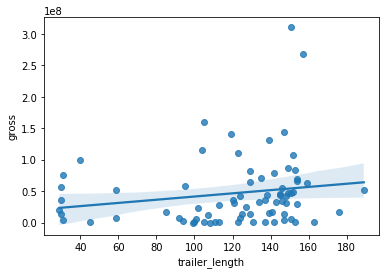

In [20]:
sns.regplot(x=random_films["trailer_length"], y=random_films["gross"])

Elke uitkomst die je krijgt zal een ander resultaat geven. Maar wat wel duidelijk is in elke uitkomst is dat er geen specifiek partroon te zien is.
<br>
We kunnen dus concluderen dat er <b>geen</b> duidelijk verband is tussen de lengte van de trailer en de omzet van de film.